##EXPLANATORY DATA ANALYSIS
The data is collected quarterly from the Federal Reserve Bank’s website with time ranging from Q1 1980 to Q3 2022 (n = 171). There is 1 dependent variable (GDP) and 19 independent variables whose description will be shown in detail below.
- **GDP**: Gross Domestic Product (Billions of Dollars)
- **MMMFFAQ027S**: Money Market Funds; Total Financial Assets, Level (Millions of Dollars)
- **ASTMA**: All Sectors; Total Mortgages; Asset, Level (Millions of Dollars)
- **BOGZ1FL072052006Q**: Interest Rates and Price Indexes; Effective Federal Funds Rate (Percent), Level
- **ROWFDIQ027S**: Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions (Millions of Dollars)
- **BOGZ1FL594090005Q**: Pension Funds; Total Financial Assets, Level (Millions of Dollars)
- **FGCCSAQ027S**: Federal Government; Consumer Credit, Student Loans; Asset, Level (Millions of Dollars)
- **TLAACBQ158SBOG**: Total Assets, All Commercial Banks (Millions of Dollars)
- **BOGZ1FA895050005Q**: All Sectors; Total Capital Expenditures, Transactions (Millions of Dollars)
- **FGLBAFQ027S**: Federal Government; Net Lending (+) or Borrowing (-) (Financial Account), Transactions (Millions of Dollars)
- **LES1252881600Q**: Employed full time: Median usual weekly real earnings: Wage and salary workers: 16 years and over (CPI Adjusted Dollars)
-  **LREM64TTUSQ156S**: Employment Rate: Aged 15-64: All Persons for the United States (Percent)
- **RSAHORUSQ156S**: Homeownership Rate in the United States (Percent)
- **NROU** : Noncyclical Rate of Unemployment (Percent)
- **A067RL1Q156SBEA**: Real Disposable Personal Income (Percentage change from the preceding period)
- **GFDEBTN** : Federal Debt: Total Public Debt (Millions of Dollars)
- **GGSAVE**: Gross Government Saving (Billions of Dollars)
- **NETEXP**: Net Exports of Goods and Services (Billions of Dollars)
- **CCUSMA02EZQ618N** : Currency Conversions: US$ Exchange Rate: Average of Daily Rates: National Currency:USD for the Euro Area (19 Countries) (Euros)
- **M2V** : Velocity of M2 Money Stock (Ratio)



In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

!pip install featurewiz
import featurewiz as FW


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 5.0 MB/s 
     |████████████████████████████████| 26.7 MB 1.5 MB/s 
     |████████████████████████████████| 3.2 MB 45.6 MB/s 
     |████████████████████████████████| 2.0 MB 63.8 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
     |████████████████████████████████| 72 kB 621 kB/s 
     |████████████████████████████████| 193.6 MB 48 kB/s 
     |████████████████████████████████| 1.6 MB 57.8 MB/s 
     |████████████████████████████████| 121 kB 70.7 MB/s 
     |████████████████████████████████| 83 kB 2.3 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
  Attempting uninstall: xgbo

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [ ]:
#load data
df = pd.read_csv('data_stat_v2.csv')
df.set_index('DATE', drop=True)

,GDP,MMMFFAQ027S,ASTMA,BOGZ1FL072052006Q,ROWFDIQ027S,BOGZ1FL594090005Q,FGCCSAQ027S,TLAACBQ158SBOG,BOGZ1FA895050005Q,FGLBAFQ027S,LES1252881600Q,LREM64TTUSQ156S,RSAHORUSQ156S,NROU,A067RL1Q156SBEA,GFDEBTN,GGSAVE,NETEXP,CCUSMA02EZQ618N,M2V
DATE,,,,,,,,,,,,,,,,,,,,
1/1/1980,2789.842,61292,1357614,17.19,13284,1560558,0,7.9,905938,-71148,321,67.890961,65.5,6.217371,1.4,863451,19.383,-35.803,0.709434,1.869
4/1/1980,2797.352,77827,1383696,9.47,23024,1608461,0,8.0,850934,-137024,315,67.064258,65.6,6.210709,-3.5,877614,-10.329,-15.211,0.719469,1.847
7/1/1980,2856.483,79901,1421427,10.87,18852,1656801,0,9.7,838886,-118668,319,66.775205,65.6,6.203388,4.6,907701,-16.679,5.471,0.702709,1.831
10/1/1980,2985.557,76415,1457828,18.90,12512,1700467,0,13.0,910033,-71272,315,67.003026,65.6,6.195496,5.6,930210,2.714,-6.682,0.746856,1.874
1/1/1981,3124.206,114223,1484685,14.70,12584,1745769,0,10.0,994544,-107240,314,67.302961,65.6,6.187123,-0.6,964531,22.055,-14.259,0.811010,1.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/1/2021,23550.420,5019225,17636139,0.08,499760,27083422,1436411,8.2,6814241,-2568924,367,69.748566,65.4,4.456865,-4.6,28428919,-1516.483,-889.143,0.848375,1.132
10/1/2021,24349.121,5205455,18060176,0.08,504992,27662598,1436356,10.4,7279093,-1535092,362,70.531902,65.4,4.450651,-4.9,29617215,-819.386,-914.708,0.874533,1.142
1/1/2022,24740.480,5090707,18321028,0.20,298340,27212035,1454955,1.4,7534022,-928155,362,70.993493,65.5,4.445137,-10.6,30400960,-170.457,-1116.682,0.890736,1.140


In [ ]:
df.describe()

,GDP,MMMFFAQ027S,ASTMA,BOGZ1FL072052006Q,ROWFDIQ027S,BOGZ1FL594090005Q,FGCCSAQ027S,TLAACBQ158SBOG,BOGZ1FA895050005Q,FGLBAFQ027S,LES1252881600Q,LREM64TTUSQ156S,RSAHORUSQ156S,NROU,A067RL1Q156SBEA,GFDEBTN,GGSAVE,NETEXP,CCUSMA02EZQ618N,M2V
count,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000,1.710000e+02,1.710000e+02,171.000000,1.710000e+02,1.710000e+02,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000,171.000000
mean,11377.838667,1.839531e+06,8.569869e+06,4.389474,155555.397661,1.114659e+07,3.136796e+05,6.080117,3.275149e+06,-5.691790e+05,331.538012,70.241508,65.591228,5.244801,2.873099,9.391162e+06,-291.377942,-355.920404,0.880592,1.797760
std,6102.187837,1.433792e+06,5.424841e+06,4.058849,156797.198801,7.568698e+06,4.720220e+05,5.379117,1.683796e+06,7.766121e+05,16.342385,2.429010,1.689095,0.537526,6.822073,7.965623e+06,603.044809,277.405310,0.146516,0.267658
min,2789.842000,6.129200e+04,1.357614e+06,0.070000,-293968.000000,1.560558e+06,0.000000e+00,-11.400000,8.388860e+05,-7.065774e+06,309.000000,62.418276,63.100000,4.435784,-28.800000,8.634510e+05,-4345.673000,-1116.682000,0.640181,1.112000
25%,6009.924500,4.940830e+05,3.758682e+06,0.885000,34436.000000,4.308769e+06,0.000000e+00,3.000000,1.724613e+06,-7.229130e+05,316.000000,68.284586,64.100000,4.786561,1.100000,3.299066e+06,-388.040500,-548.573000,0.778365,1.645000
50%,10598.020000,1.865022e+06,7.057091e+06,3.980000,110320.000000,9.649967e+06,6.668300e+04,6.700000,3.263405e+06,-3.305260e+05,332.000000,70.940047,65.300000,5.172614,3.000000,5.776091e+06,-98.850000,-370.634000,0.849906,1.834000
75%,15955.545500,2.969142e+06,1.384548e+07,6.525000,261354.000000,1.652744e+07,5.130760e+05,8.750000,4.344534e+06,-2.042160e+05,339.000000,71.915597,67.000000,5.684377,4.600000,1.541473e+07,-6.868500,-92.503500,0.923845,1.985000
max,25698.960000,5.205455e+06,1.905848e+07,19.100000,956604.000000,2.766260e+07,1.484310e+06,43.700000,7.534022e+06,3.498570e+05,393.000000,74.266824,69.400000,6.217371,52.400000,3.092891e+07,424.010000,5.471000,1.463133,2.192000


In [ ]:
#log scale the data 
for column in df.drop('DATE',axis=1).columns:
  df[column] = np.log(df[column])
#drop columns those cannot be log-scaled (with negative values, zeros, etc)
df = df.drop(['FGCCSAQ027S','FGLBAFQ027S','GGSAVE','NETEXP','A067RL1Q156SBEA','TLAACBQ158SBOG','ROWFDIQ027S','M2V'],axis=1)
df

,DATE,GDP,MMMFFAQ027S,ASTMA,BOGZ1FL072052006Q,BOGZ1FL594090005Q,BOGZ1FA895050005Q,LES1252881600Q,LREM64TTUSQ156S,RSAHORUSQ156S,NROU,GFDEBTN,CCUSMA02EZQ618N
0,1/1/1980,7.933740,11.023405,14.121239,2.844328,14.260554,13.716726,5.771441,4.217903,4.182050,1.827347,13.668692,-0.343287
1,4/1/1980,7.936429,11.262244,14.140269,2.248129,14.290788,13.654090,5.752573,4.205651,4.183576,1.826275,13.684962,-0.329242
2,7/1/1980,7.957346,11.288544,14.167172,2.386007,14.320399,13.639830,5.765191,4.201332,4.183576,1.825096,13.718670,-0.352812
3,10/1/1980,8.001542,11.243934,14.192458,2.939162,14.346413,13.721236,5.752573,4.204738,4.183576,1.823823,13.743166,-0.291882
4,1/1/1981,8.046935,11.645908,14.210713,2.687847,14.372706,13.810040,5.749393,4.209204,4.183576,1.822470,13.779397,-0.209475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,7/1/2021,10.066899,15.428786,16.685461,-2.525729,17.114432,15.734525,5.905362,4.244897,4.180522,1.494446,17.162917,-0.164433
167,10/1/2021,10.100251,15.465218,16.709220,-2.525729,17.135592,15.800517,5.891644,4.256065,4.180522,1.493050,17.203866,-0.134065
168,1/1/2022,10.116196,15.442927,16.723560,-1.609438,17.119170,15.834940,5.891644,4.262588,4.182050,1.491811,17.229985,-0.115707
169,4/1/2022,10.136521,15.431415,16.745985,0.190620,17.079366,15.827820,5.880533,4.266782,4.186620,1.490702,17.235483,-0.062687


In [ ]:
df.describe()

,GDP,MMMFFAQ027S,ASTMA,BOGZ1FL072052006Q,BOGZ1FL594090005Q,BOGZ1FA895050005Q,LES1252881600Q,LREM64TTUSQ156S,RSAHORUSQ156S,NROU,GFDEBTN,CCUSMA02EZQ618N
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,9.173834,13.951733,15.699356,0.664216,15.940069,14.852610,5.802566,4.251338,4.183116,1.652078,15.652234,-0.139581
std,0.605606,1.127408,0.788823,1.656661,0.819222,0.573069,0.048353,0.034891,0.025563,0.101598,0.961819,0.154526
min,7.933740,11.023405,14.121239,-2.659260,14.260554,13.639830,5.733341,4.133858,4.144721,1.489704,13.668692,-0.446004
25%,8.701167,13.110353,15.139564,-0.127963,15.276095,14.360512,5.755742,4.223684,4.160444,1.565812,15.008951,-0.250561
50%,9.268422,14.438783,15.769543,1.381282,16.082465,14.998282,5.805135,4.261835,4.178992,1.643378,15.569238,-0.162629
75%,9.677537,14.903784,16.443465,1.875641,16.620449,15.284429,5.826000,4.275493,4.204692,1.737720,16.550757,-0.079219
max,10.154206,15.465218,16.763023,2.949688,17.135592,15.834940,5.973810,4.307664,4.239887,1.827347,17.247202,0.380580


The figures of all the variables were sketched by R as follows.
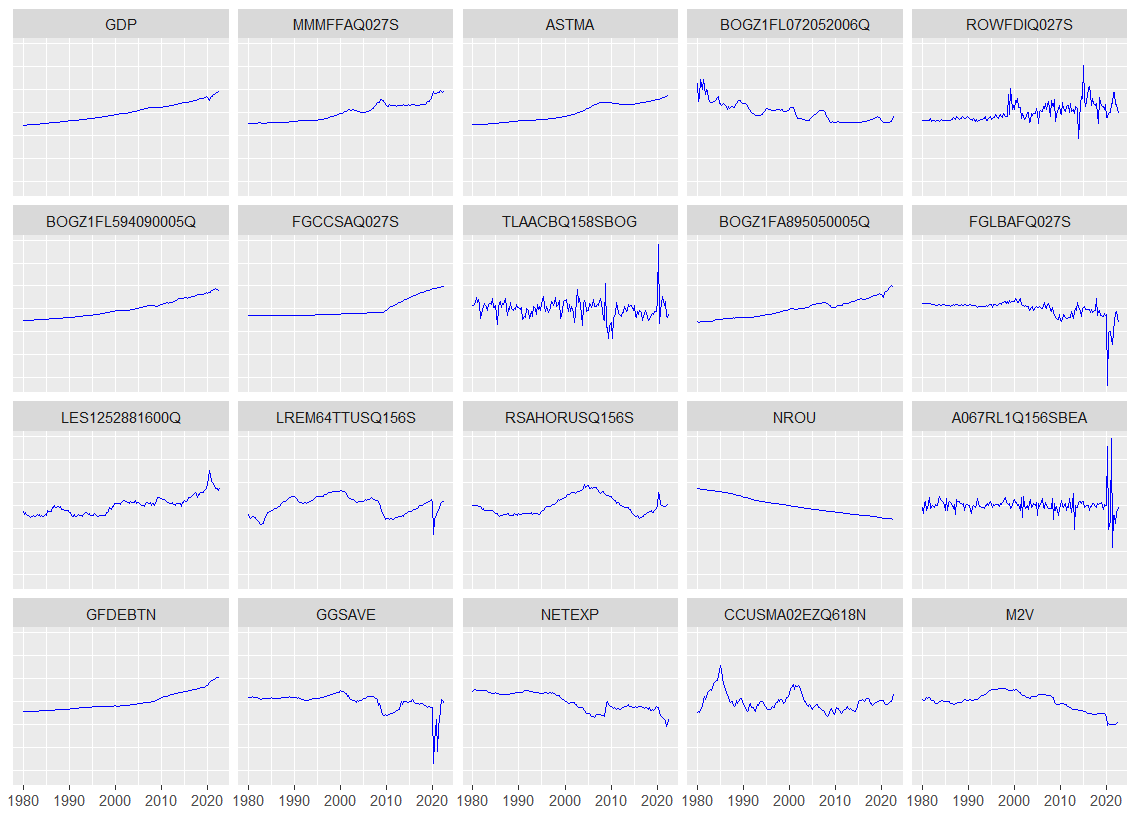
*Figure: U.S GDP & Macroeconomic Factors Trend from 1980 to 2022*



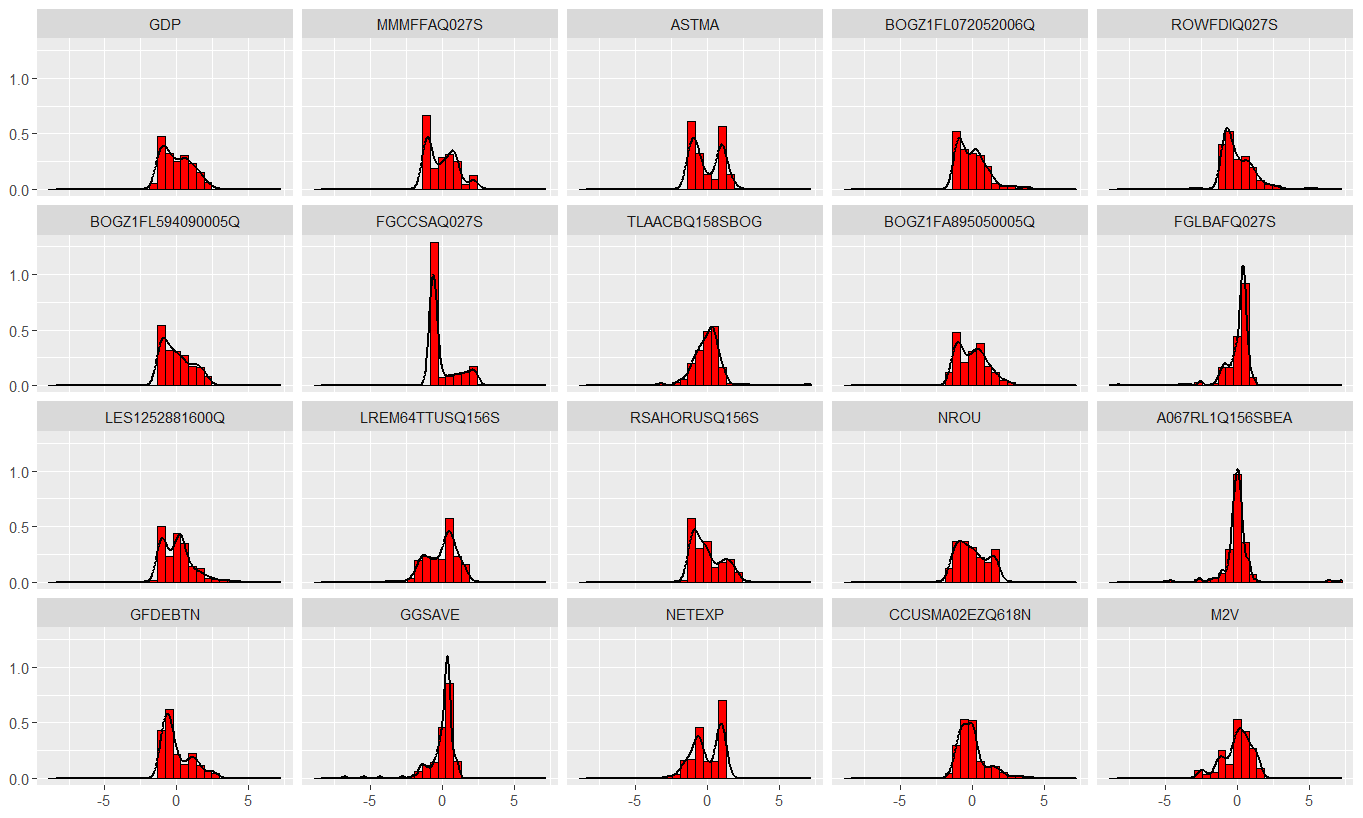
*Figure: U.S GDP & Macroeconomic Factors Histogram from 1980 to 2022*

##FEATURE SELECTION
Feature selection process aims to identify the determinants of the U.S.'s GDP. This project emloyed *featurewiz* package and **Stepwise Regression**. 

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Since dask_xgboost_flag is True, reducing memory size and loading into dask
    Loaded train data. Shape = (171, 12)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No

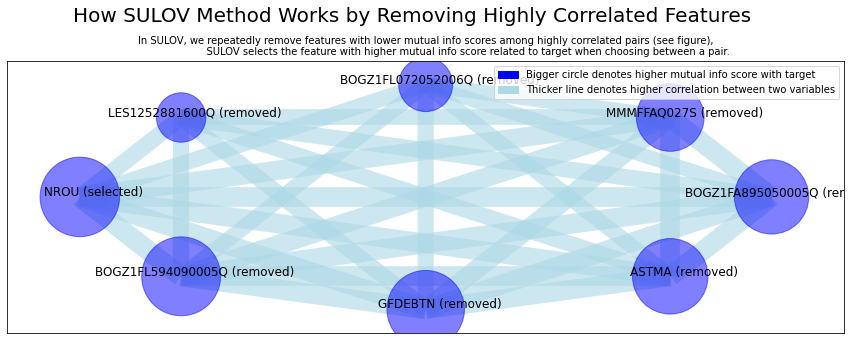

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 4
Final list of selected 4 vars after SULOV = ['CCUSMA02EZQ618N', 'LREM64TTUSQ156S', 'RSAHORUSQ156S', 'NROU']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using DASK XGBoost
Current number of predictors before recursive XGBoost = 4 
    Taking top 2 features per iteration...
    Dask version = 2022.02.1
    Using Dask XGBoost algorithm with 2 virtual CPUs and 13GB memory limit...
Dask client configuration: <Client: 'tcp://127.0.0.1:43965' processes=2 threads=2, memory=24.21 GiB>
    XGBoost version using 1.7.2 as tree method: gpu_hist
Number of booster rounds = 100
        using 4 variables...
Dask

In [ ]:
# automatic feature selection by using featurewiz package
target = 'GDP'
features=FW.featurewiz(df.drop(['DATE'],axis=1), target, corr_limit=0.70, verbose=2, sep=',', 
        header=0, test_data='',feature_engg='', category_encoders='',
        dask_xgboost_flag=True, nrows=None)

In [ ]:
# Absolute correlation matrix of the selected features
corr_abs = df[features[0]].corr().abs()
corr_abs

,CCUSMA02EZQ618N,LREM64TTUSQ156S,RSAHORUSQ156S,NROU
CCUSMA02EZQ618N,1.000000,0.044459,0.172945,0.355500
LREM64TTUSQ156S,0.044459,1.000000,0.164501,0.017672
RSAHORUSQ156S,0.172945,0.164501,1.000000,0.296899
NROU,0.355500,0.017672,0.296899,1.000000


In [ ]:
df[features[0]].describe()

,CCUSMA02EZQ618N,LREM64TTUSQ156S,RSAHORUSQ156S,NROU
count,171.000000,171.000000,171.000000,171.000000
mean,-0.139581,4.251338,4.183116,1.652078
std,0.154526,0.034891,0.025563,0.101598
min,-0.446004,4.133858,4.144721,1.489704
25%,-0.250561,4.223684,4.160444,1.565812
50%,-0.162629,4.261835,4.178992,1.643378
75%,-0.079219,4.275493,4.204692,1.737720
max,0.380580,4.307664,4.239887,1.827347


In [ ]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.01, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.Logit
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[included+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                print('===========================================================')

        # backward step
        model = sm.OLS(y,sm.add_constant(X[included])).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
                print('===========================================================')
        if not changed:
            break
    return included
X = df[features[0]]
y = df['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, random_state=123456)
significant_var = stepwise_selection(X_train, y_train, initial_list = [])
significant_var = stepwise_selection(X_train, y_train, initial_list = significant_var)

Add  NROU                           with p-value 3.75684e-134
Add  LREM64TTUSQ156S                with p-value 5.60041e-12
Add  CCUSMA02EZQ618N                with p-value 6.80781e-05


##OLS Method
This project employed the Linear Regression using OLS method.

In [ ]:
# Apply the model to the obtained data
X = df[['NROU', 'CCUSMA02EZQ618N','LREM64TTUSQ156S']]
y = df['GDP']
X = sm.add_constant(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False, random_state=12345)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     6647.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):          8.87e-144
Time:                        02:01:05   Log-Likelihood:                 236.51
No. Observations:                 136   AIC:                            -465.0
Df Residuals:                     132   BIC:                            -453.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.1056      0.469     

In [ ]:
print(model.params)

const              16.105623
NROU               -6.175923
CCUSMA02EZQ618N     0.103667
LREM64TTUSQ156S     0.776210
dtype: float64


In [ ]:
# Correlation matrix of the explanatory variables
X.corr()

,const,NROU,CCUSMA02EZQ618N,LREM64TTUSQ156S
const,NaN,NaN,NaN,NaN
NROU,NaN,1.000000,0.355500,-0.017672
CCUSMA02EZQ618N,NaN,0.355500,1.000000,0.044459
LREM64TTUSQ156S,NaN,-0.017672,0.044459,1.000000


In [ ]:
y_pred_train = model.fittedvalues
y_pred_test = model.predict(X_test)

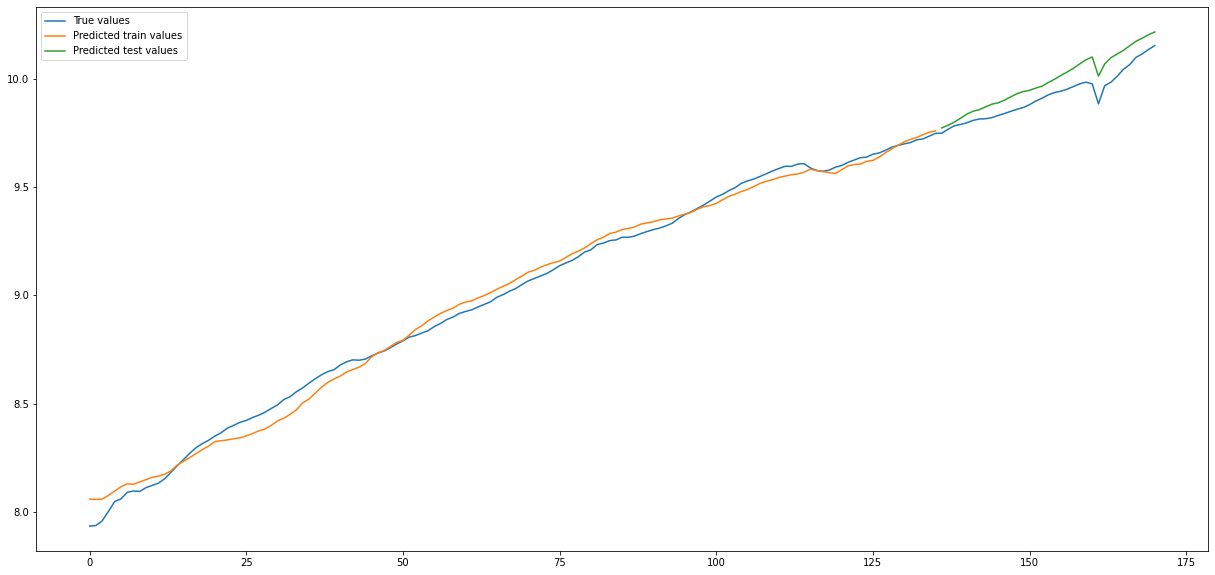

In [ ]:
plt.figure(figsize = (21,10))
plt.plot(y, label = 'True values')
plt.plot(y_pred_train, label = 'Predicted train values')
plt.plot(y_pred_test, label = 'Predicted test values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train)

0.00180720861617508

In [ ]:
mean_squared_error(y_test, y_pred_test)

0.005501422142687502

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, y_pred_train)

0.03557742369115147

In [ ]:
mean_absolute_error(y_test, y_pred_test)

0.06910106639643797

###OLS assumptions

In [ ]:
# assumption of multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
vif = pd.DataFrame()
vif['features'] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif)

          features    VIF Factor
0            const  15467.588881
1             NROU      1.146136
2  CCUSMA02EZQ618N      1.148048
3  LREM64TTUSQ156S      1.003270


In [ ]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(model.resid, model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 97.88235474336877, 'Test Statistic p-value': 4.2155547262464223e-17, 'F-Statistic': 35.95061964560272, 'F-Test p-value': 9.830575027593002e-31}
